In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [31]:
data = pd.read_csv("synthetic_employee_burnout.csv")
data

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,Max Ivanov,32,Male,Analyst,3,60,21,4.40,1,0
1,Max Wang,40,Female,Engineer,9,47,67,2.09,2,0
2,Nina Petrov,33,Female,Engineer,2,44,20,2.58,3,0
3,John Ivanov,35,Female,Manager,6,44,70,3.23,8,0
4,John Wang,59,Male,Sales,8,38,46,4.41,1,0
...,...,...,...,...,...,...,...,...,...,...
1995,Leo Brown,41,Female,Manager,4,63,17,3.40,4,0
1996,Alex Brown,23,Female,HR,2,39,20,4.67,9,0
1997,Nina Wang,31,Female,HR,10,39,4,4.10,4,0
1998,Kate Lee,25,Male,HR,0,40,57,2.11,4,0


In [3]:
data.shape

(2000, 10)

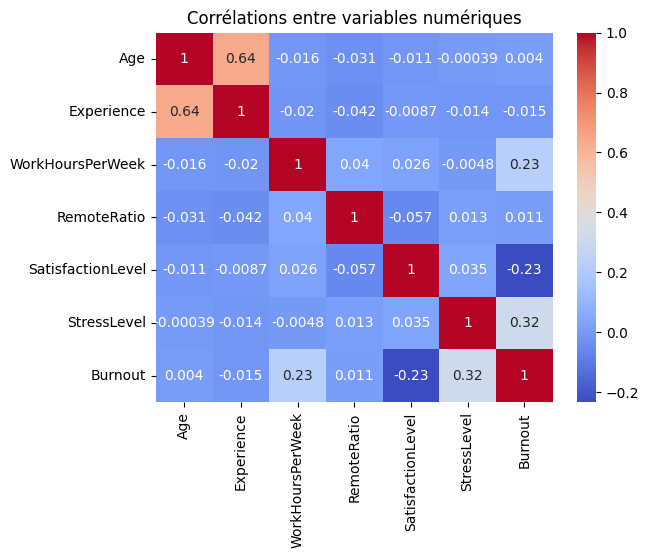

In [5]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables numériques")
plt.show()

In [7]:
model = smf.logit('Burnout ~ Age + Gender + JobRole +	Experience + WorkHoursPerWeek +	RemoteRatio + SatisfactionLevel + StressLevel', data=data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.078848
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                Burnout   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1988
Method:                           MLE   Df Model:                           11
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.6703
Time:                        10:08:25   Log-Likelihood:                -157.70
converged:                       True   LL-Null:                       -478.35
Covariance Type:            nonrobust   LLR p-value:                2.028e-130
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -22.0902      2.169    -10.186      0.000     -26.341     -17.839
G

In [8]:
print(model.params)

Intercept             -22.090163
Gender[T.Male]          0.088791
JobRole[T.Engineer]     0.326385
JobRole[T.HR]           0.250103
JobRole[T.Manager]      0.078950
JobRole[T.Sales]        0.228949
Age                    -0.008115
Experience              0.010052
WorkHoursPerWeek        0.227795
RemoteRatio            -0.003560
SatisfactionLevel      -2.340390
StressLevel             1.582468
dtype: float64


In [9]:
print(model.pvalues)

Intercept              2.300382e-24
Gender[T.Male]         7.628016e-01
JobRole[T.Engineer]    5.027256e-01
JobRole[T.HR]          6.033974e-01
JobRole[T.Manager]     8.652409e-01
JobRole[T.Sales]       6.252763e-01
Age                    6.108886e-01
Experience             6.061628e-01
WorkHoursPerWeek       1.418990e-22
RemoteRatio            4.815362e-01
SatisfactionLevel      1.309038e-24
StressLevel            3.159120e-24
dtype: float64


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('Burnout ~ Age + Gender + JobRole + Experience + WorkHoursPerWeek + RemoteRatio + SatisfactionLevel + StressLevel', data=data, return_type='dataframe')
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable        VIF
0             Intercept  51.816619
1        Gender[T.Male]   1.006372
2   JobRole[T.Engineer]   1.564583
3         JobRole[T.HR]   1.574146
4    JobRole[T.Manager]   1.598536
5      JobRole[T.Sales]   1.570443
6                   Age   1.698354
7            Experience   1.698649
8      WorkHoursPerWeek   1.003175
9           RemoteRatio   1.008980
10    SatisfactionLevel   1.006029
11          StressLevel   1.004584


In [36]:
new_data = pd.DataFrame({
    'Age': [52],
    'Gender': ['Male'],
    'JobRole': ["Sales"],
    'Experience': [8],
    'WorkHoursPerWeek': [61],
    'RemoteRatio': [23],
    'SatisfactionLevel': [1.24],
    'StressLevel': [10]
})

predicted_burnout = model.predict(new_data)
print(predicted_burnout)

0    0.990265
dtype: float64
